# State Farm Distracted Driver Detection

---



#Context & Motivation

We've all been there: a light turns green and the car in front of you doesn't budge. Or, a previously unremarkable vehicle suddenly slows and starts swerving from side-to-side.

When you pass the offending driver, what do you expect to see? You certainly aren't surprised when you spot a driver who is texting, seemingly enraptured by social media, or in a lively conversation on their hand-held phone.
According to the CDC motor vehicle safety division, one in five car accidents is caused by a distracted driver. Sadly, this translates to 425,000 people injured and 3,000 people killed by distracted driving every year.

State Farm hopes to improve these alarming statistics, and better insure their customers, by testing whether dashboard cameras can automatically detect drivers engaging in distracted behaviors. Given a dataset of 2D dashboard camera images, State Farm is challenging Kagglers to classify each driver's behavior. Are they driving attentively, wearing their seatbelt, or taking a selfie with their friends in the backseat? (Source: State Farm Distracted Driver Detection Kaggle Competition)

# Goal of the project

The purpose of this study is to see if we can **"predict a driver's distracted driving behavior based on a dashboard camera image."**

*italicized text*# Data & Operationalization

The dataset we will use in this study is titled, "State Farm Distracted Driver Detection" and is sourced from Kaggle through a public competition that was conducted in 2016. The dataset includes 102,150 images and covers 10 different types of distracted driving. Source images can be found here: https://www.kaggle.com/competitions/state-farm-distracted-driver-detection/data

Due to the sheer size of the dataset, we decided to use just the Training dataset for all analysis. While smaller, this dataset still contained 22,424 images. From this dataset, we created a new train-test split of 70/30.


**Target Variables**

We will be looking to properly predict the label for each image across all 10 classes. The 10 classes are as follows: normal driving, texting - right, talking on the phone - right, texting - left, talking on the phone - left, operating the radio, drinking, reaching behind, hair and makeup, and talking to passenger.


**Type of Problem**

This problem is structured as multi-classes with a single label associated with each image. Thus, this is a multi-class image classification problem.

**Evaluation Metric**

We will be using Multi-Class Log Loss to evaluate our models as this is a multi-class image problem. This metric was also used to evaluate models in the Kaggle competition. In the Kaggle competition, the winning team had a final multi-class log loss score of 0.08739. We will look to build a model that achieves a similar loss score.


# Loading Libraries & Data from Kaggle

First we load all necessary libraries and connect to the Kaggle API

In [ ]:
!pip install kaggle

!pip install opendatasets --upgrade

import numpy as np
import pandas as pd

# # from the Kaggle account settings page.
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"jaijaimacabangon","key":"9ab3ac36385bc6321dbf8f6da74d77f4"}'}

In [ ]:
#The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# # This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#Download the competition data from Kaggle via the API

# !kaggle competitions download -c state-farm-distracted-driver-detection

In [ ]:
od.download(
    "https://www.kaggle.com/competitions/state-farm-distracted-driver-detection/data")

Skipping, found downloaded files in "./state-farm-distracted-driver-detection" (use force=True to force download)


In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
#Load train images
driver_files_train = np.array(glob("state-farm-distracted-driver-detection/imgs/train/*/*"))
# print number of images in each dataset
print('There are %d total images in the Kaggle "train" dataset. We will use this as our train & test data set' % len(driver_files_train))

There are 22424 total images in the Kaggle "train" dataset. We will use this as our train & test data set


# Data Preprocessing

> Indented block

**bold text**

## Set random seed

In [ ]:
np.random.seed(1234)
tf.random.set_seed(1234)

NameError: ignored

## Check for corrupted files

In [ ]:
train_imgs = './imgs/train/'

corrupt_count_train = 0

for file in train_imgs:
  #Tries to read file if not able to it'll count up 1 to check for corrupted files
    try:
        img = cv2.imread(file)
    except:
        corrupt_count_train += 1
        pass

print("Number of corrupted .jpg files in train_imgs:",corrupt_count_train)

## Resize images and split the data into 70/30 Train/Test

In [ ]:
directory = 'state-farm-distracted-driver-detection/imgs/train'
test_directory = 'state-farm-distracted-driver-detection/imgs/test/'
classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [ ]:
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)

        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            new_img = cv2.resize(img_array,(240,240))

            new_img = cv2.resize(img_array,(240,240))

            training_data.append([
                new_img,class_num])

In [ ]:
training_data = []

create_training_data()

In [ ]:
random.shuffle(training_data)
#training_data = training_data[:300]
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)

In [ ]:
len(training_data)

In [ ]:
#Split the data into a 70/30 split

X = np.array(x).reshape(-1,240,240,3)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1234)

In [ ]:
y_train_encoded = keras.utils.np_utils.to_categorical(y_train)
y_test_encoded = keras.utils.np_utils.to_categorical(y_test)

In [ ]:
# normalizing the image pixels
x_train_normalized = x_train/255
x_test_normalized = x_test/255

# Exploratory Data Analysis

Classname key:

c0: normal driving \
c1: texting - right \
c2: talking on the phone - right \
c3: texting - left \
c4: talking on the phone - left \
c5: operating the radio \
c6: drinking \
c7: reaching behind \
c8: hair and makeup \
c9: talking to passenger

## Show a distribution of the Training subset

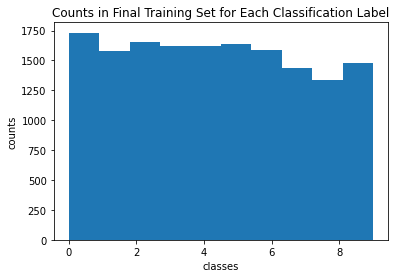

The count of normal driving is 1732 which is 7.72 % of the dataset 

The count of texting - right is 1579 which is 7.04 % of the dataset 

The count of talking on the phone - right is 1651 which is 7.36 % of the dataset 

The count of texting - left is 1623 which is 7.24 % of the dataset 

The count of talking on the phone - left is 1622 which is 7.23 % of the dataset 

The count of operating the radio is 1638 which is 7.30 % of the dataset 

The count of drinking is 1591 which is 7.10 % of the dataset 

The count of reaching behind is 1439 which is 6.42 % of the dataset 

The count of hair and makeup is 1339 which is 5.97 % of the dataset 

The count of talking to passenger is 1482 which is 6.61 % of the dataset 



In [ ]:
#Show a simple histogram of the final train dataset

plt.hist(y_train, 10)
plt.title("Counts in Final Training Set for Each Classification Label")
plt.xlabel('classes')
plt.ylabel('counts')

plt.show()


print("The count of normal driving is", y_train.count(0), "which is", f'{y_train.count(0)/len(training_data)*100:.2f}', "% of the dataset \n")
print("The count of texting - right is", y_train.count(1), "which is", f'{y_train.count(1)/len(training_data)*100:.2f}', "% of the dataset \n")
print("The count of talking on the phone - right is", y_train.count(2), "which is", f'{y_train.count(2)/len(training_data)*100:.2f}', "% of the dataset \n")
print("The count of texting - left is", y_train.count(3), "which is", f'{y_train.count(3)/len(training_data)*100:.2f}', "% of the dataset \n")
print("The count of talking on the phone - left is", y_train.count(4), "which is", f'{y_train.count(4)/len(training_data)*100:.2f}', "% of the dataset \n")
print("The count of operating the radio is", y_train.count(5), "which is", f'{y_train.count(5)/len(training_data)*100:.2f}', "% of the dataset \n")
print("The count of drinking is", y_train.count(6), "which is", f'{y_train.count(6)/len(training_data)*100:.2f}', "% of the dataset \n")
print("The count of reaching behind is", y_train.count(7), "which is", f'{y_train.count(7)/len(training_data)*100:.2f}', "% of the dataset \n")
print("The count of hair and makeup is", y_train.count(8), "which is", f'{y_train.count(8)/len(training_data)*100:.2f}', "% of the dataset \n")
print("The count of talking to passenger is", y_train.count(9), "which is", f'{y_train.count(9)/len(training_data)*100:.2f}', "% of the dataset \n")


## Display images for each of the 10 classes from the final training data subset

In [ ]:
from collections import Counter

In [ ]:
print(Counter(y_train).keys())
print(Counter(y_train).values())

dict_keys([7, 5, 6, 8, 1, 4, 9, 0, 2, 3])
dict_values([1379, 1652, 1641, 1335, 1585, 1627, 1475, 1734, 1620, 1648])


In [ ]:
# creating a list of category names in alphabetical order
driver_classes = ["normal driving", "texting - right", "talking on the phone - right",
                    "texting - left", "talking on the phone - left", "operating the radio",
                    "drinking", "reaching behind", "hair and makeup", "talking to passenger"]

In [ ]:
index_test_normal_driving = [i for i in range(len(y_train)) if y_train[i] == 0]
index_test_texting_right = [i for i in range(len(y_train)) if y_train[i] == 1]
index_test_phone_right = [i for i in range(len(y_train)) if y_train[i] == 2]
index_test_texting_left = [i for i in range(len(y_train)) if y_train[i] == 3]
index_test_phone_left = [i for i in range(len(y_train)) if y_train[i] == 4]
index_test_radio = [i for i in range(len(y_train)) if y_train[i] == 5]
index_test_drinking = [i for i in range(len(y_train)) if y_train[i] == 6]
index_test_reach_behind = [i for i in range(len(y_train)) if y_train[i] == 7]
index_test_hair_makeup = [i for i in range(len(y_train)) if y_train[i] == 8]
index_test_passenger = [i for i in range(len(y_train)) if y_train[i] == 9]

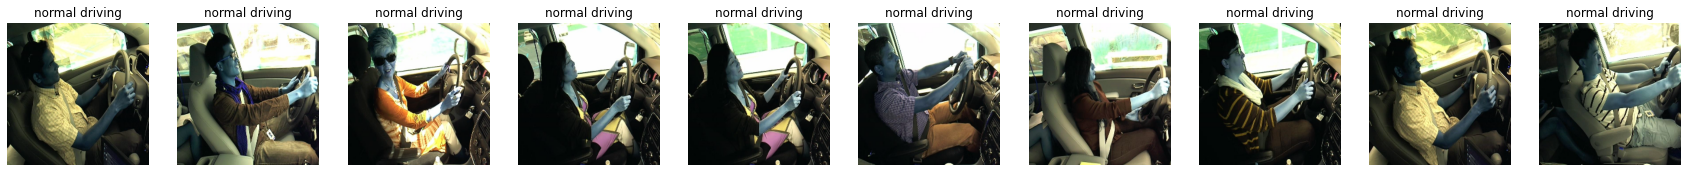

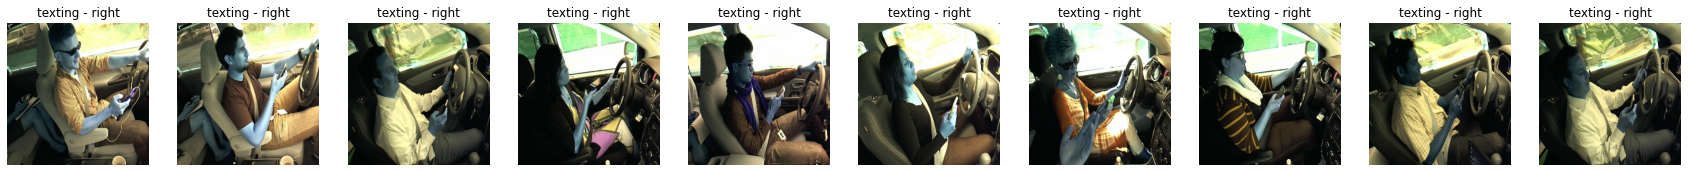

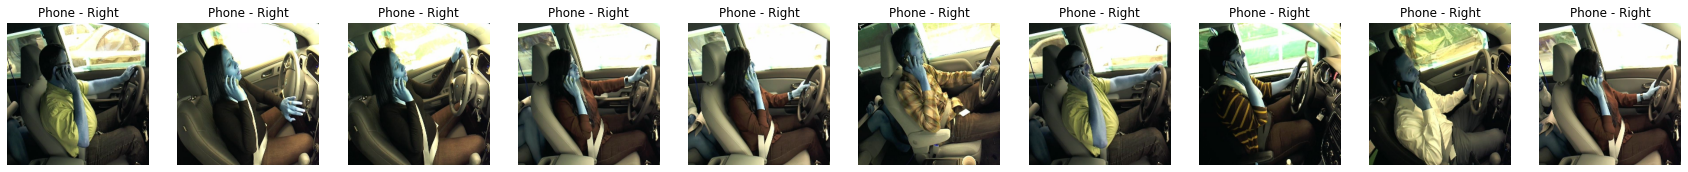

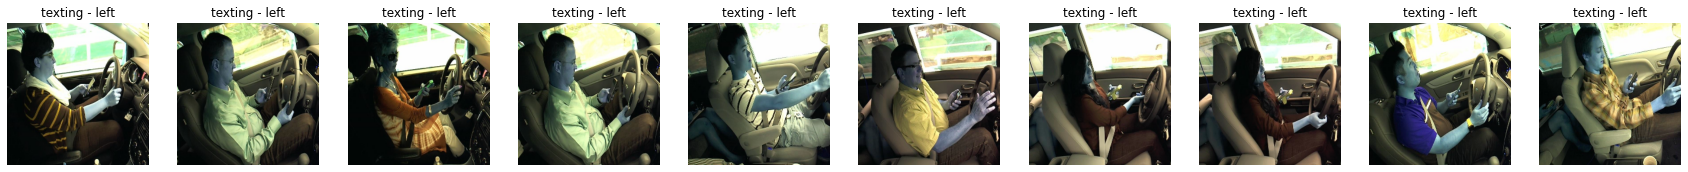

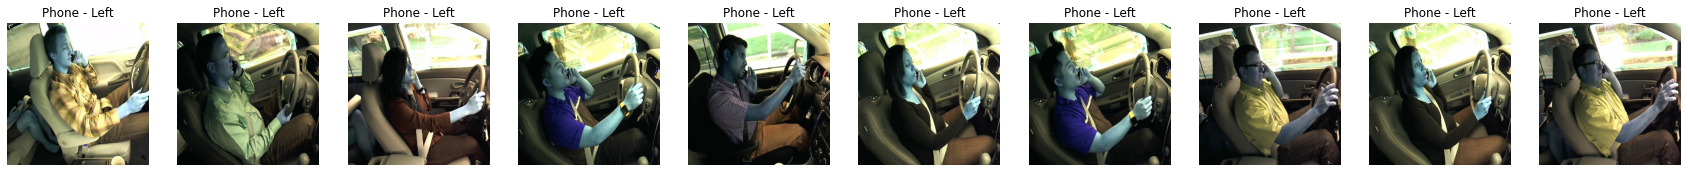

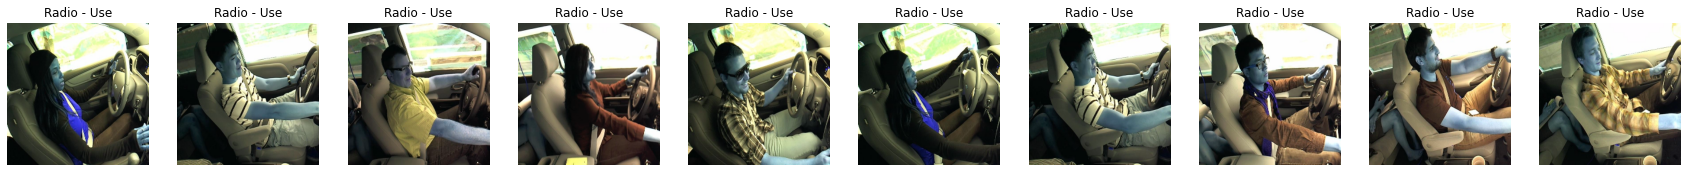

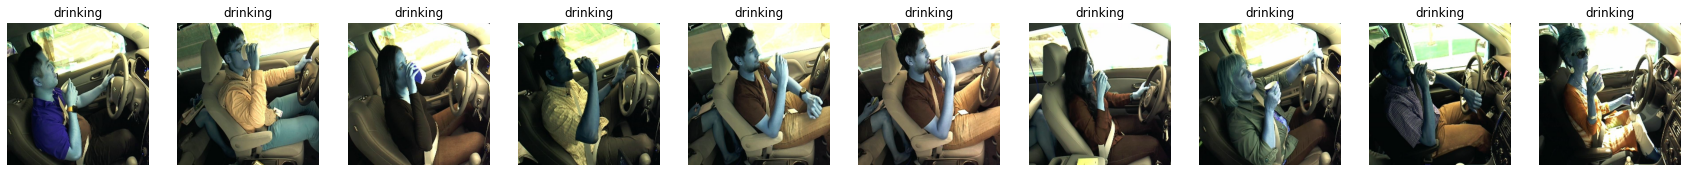

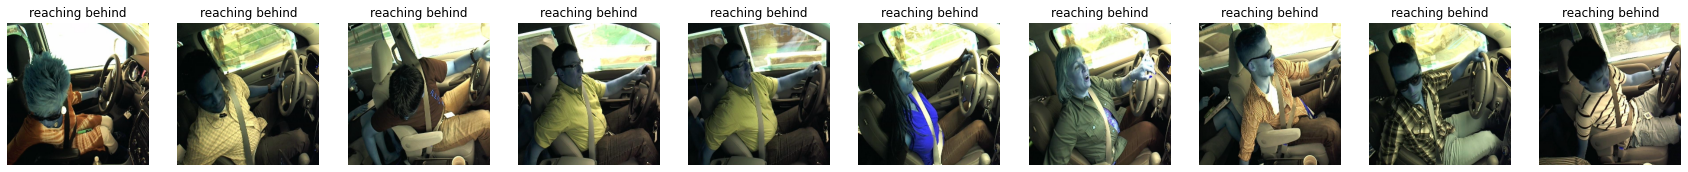

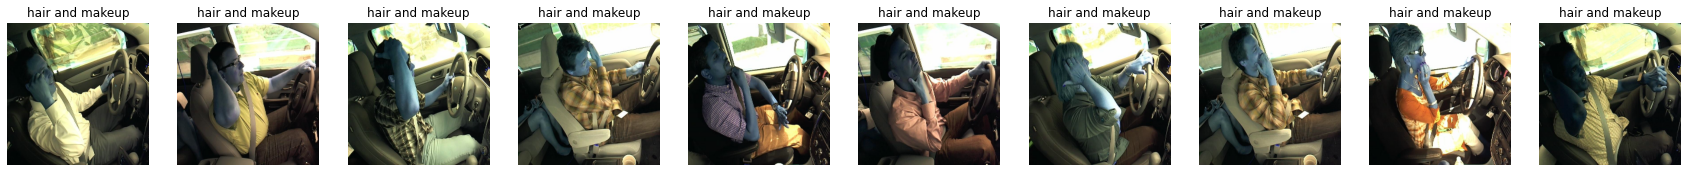

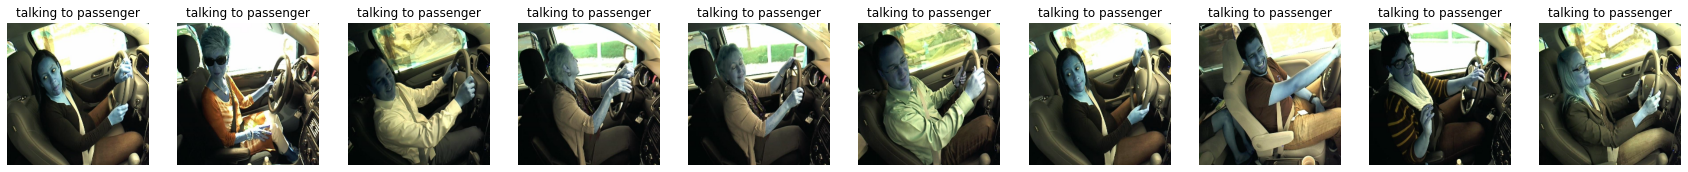

In [ ]:
# print(y_train)
# print(x_train[0].shape)

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,25))
for i in range(10):
  image = x_train[index_test_normal_driving[i]]
  label = driver_classes[0]
  label_name = label
  axs[i].imshow(image, cmap='gray')
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,25))
for i in range(10):
  image = x_train[index_test_texting_right[i]]
  label = driver_classes[1]
  label_name = label
  axs[i].imshow(image, cmap='gray')
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()

#Plot 2
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,25))
for i in range(10):
  image = x_train[index_test_phone_right[i]]
  #label = driver_classes[2]
  label = "Phone - Right"
  label_name = label
  axs[i].imshow(image, cmap='gray')
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,25))
for i in range(10):
  image = x_train[index_test_texting_left[i]]
  label = driver_classes[3]
  label_name = label
  axs[i].imshow(image, cmap='gray')
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,25))
for i in range(10):
  image = x_train[index_test_phone_left[i]]
  #label = driver_classes[4]
  label = "Phone - Left"
  label_name = label
  axs[i].imshow(image, cmap='gray')
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,25))
for i in range(10):
  image = x_train[index_test_radio[i]]
  # label = driver_classes[5]
  label = "Radio - Use"
  label_name = label
  axs[i].imshow(image, cmap='gray')
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,25))
for i in range(10):
  image = x_train[index_test_drinking[i]]
  label = driver_classes[6]
  label_name = label
  axs[i].imshow(image, cmap='gray')
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,25))
for i in range(10):
  image = x_train[index_test_reach_behind[i]]
  label = driver_classes[7]
  label_name = label
  axs[i].imshow(image, cmap='gray')
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,25))
for i in range(10):
  image = x_train[index_test_hair_makeup[i]]
  label = driver_classes[8]
  label_name = label
  axs[i].imshow(image, cmap='gray')
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(30,25))
for i in range(10):
  image = x_train[index_test_passenger[i]]
  label = driver_classes[9]
  label_name = label
  axs[i].imshow(image, cmap='gray')
  axs[i].set_title(label_name)
  axs[i].axis('off')
plt.show()

## Data Preprocessing Discussion

From our initial analysis we can see that there are 22,424 images in the Training dataset. These are broken out across 10 different categories.

The distribution across those 10 categories is fairly even, ranging from [INSERT CLASS WITH LOWEST RANGE] to [INSERT CLASS WITH HIGHEST RANGE. A quick check showed that none of the files were corrupted and therefore could be used as part of the analysis.

Based on the relatively even distribution within the training dataset, we will not need to adjust the distribution of the training set. If we however, were going to create a binary classifier for "normal driving (class 0)" as the target vs "distracted driving (classes 1 to 9)", we would have an [INSERT PERCENTAGE]% vs [INSERT PERCENTAGE]% split in the data. With this uneven distribution, we would need to consider employing a technique such as SMOTE to generate synthetic samples from the minority class and help with the class imbalance.

We created a new train-test split of 70/30.

As part of the preprocessing, we also resized the images to 240x240 pixels. We also normalized the pixels by dividing by 255.

The final data is stored in 4 dimensional numpy array. The first dimension denotes number of images, and each image is stacked on top of each other as 3 dimensional numpy array. The second dimension **240** denotes the number of pixels along x-axis. The third dimension **240** denotes the number of pixels along y-axis. The fourth dimension **3** is total number of channels in those images. Since these images are colored they consist of RGB (Red, Green and Blue) channels.

After reviewing the images for each of the classes, one interesting insight is that only "normal driving" and "talking to passenger" shows the driver with both hands on the wheel, whereas all other classes show one hand off the wheel. This change to the body language will likely help the model drill down to these two classes, and will then need to assess the direction of the driver's head to decide on the final class.

We hypothesize that the model may also have challenges with "operating the radio" as the movement for the right hand is relatively understated, and there are no props such as a phone or coffee cup to help the model decipher the action.

# Baseline Model: Majority Baseline

For the baseline model, we will create a simple Majority Baseline model that will return the most common class which is "normal driving".

In [ ]:
# Majority Baseline Classifier

def majority_baseline(x):
    return 0  # corresponds to 'normal driving'

In [ ]:
y_train_pred_majority_baseline = [majority_baseline(i) for i in y_train]
y_test_pred_majority_baseline = [majority_baseline(i) for i in y_test]


counter = 0

result = [counter + 1 for a, b in zip(y_train_pred_majority_baseline, y_train) if a==b]


counter_test = 0

result_test = [counter_test + 1 for a, b in zip(y_train_pred_majority_baseline, y_train) if a==b]


print('Majority baseline train accuracy:', round(sum(result) / len(y_train),3))
print('Majority baseline test accuracy:', round(sum(result_test) / len(y_test),3))

Majority baseline train accuracy: 0.11
Majority baseline test accuracy: 0.257


## Baseline Model Results

As we can see from above, the baseline model does a poor job of predicting the correct class, with [INSERT PERCENTAGE]% accuracy for the train data and [INSERT PERCENTAGE]% accuracy for the test data.

We will look to significantly improve these results as we implement more robust model architectures.

# Challenger Model #1: Multi-Class Logistic Regression

For our first challenger model we are implementing a multi-class logistic regression model. This is a good model architecture for this problem as we have >2 classes and require a selection of just one class as the output.

In [ ]:
def build_model_multiclass_regression(n_classes, learning_rate=0.1):

  tf.keras.backend.clear_session()
  np.random.seed(0)
  tf.random.set_seed(0)

  model_0 = keras.Sequential()
  model_0.add(keras.layers.Flatten())
  model_0.add(keras.layers.Dense(
      units=10,
      activation='Softmax'
  ))

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model_0.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model_0

In [ ]:
#Flatten + make y_train and y_test a numpy array
y_train_flatten = np.array(y_train).flatten()
y_test_flatten = np.array(y_test).flatten()

#Build model
model_0 = build_model_multiclass_regression(10, 0.01)

history = model_0.fit(
  x = x_train_normalized,
  y = y_train_flatten,
  epochs=20,
  validation_data =(x_test_normalized, y_test_flatten),
  verbose=2)

history_0 = pd.DataFrame(history.history)


Epoch 1/20
491/491 - 17s - loss: 78.7935 - accuracy: 0.5839 - val_loss: 27.0961 - val_accuracy: 0.6819 - 17s/epoch - 35ms/step
Epoch 2/20
491/491 - 5s - loss: 20.6581 - accuracy: 0.8029 - val_loss: 25.0191 - val_accuracy: 0.7922 - 5s/epoch - 10ms/step
Epoch 3/20
491/491 - 5s - loss: 16.0848 - accuracy: 0.8629 - val_loss: 28.3178 - val_accuracy: 0.7741 - 5s/epoch - 10ms/step
Epoch 4/20
491/491 - 5s - loss: 16.1966 - accuracy: 0.8822 - val_loss: 11.2764 - val_accuracy: 0.9151 - 5s/epoch - 10ms/step
Epoch 5/20
491/491 - 5s - loss: 14.0165 - accuracy: 0.8989 - val_loss: 5.0310 - val_accuracy: 0.9593 - 5s/epoch - 10ms/step
Epoch 6/20
491/491 - 5s - loss: 11.6385 - accuracy: 0.9208 - val_loss: 5.5023 - val_accuracy: 0.9593 - 5s/epoch - 10ms/step
Epoch 7/20
491/491 - 5s - loss: 11.5068 - accuracy: 0.9242 - val_loss: 18.9561 - val_accuracy: 0.8916 - 5s/epoch - 10ms/step
Epoch 8/20
491/491 - 5s - loss: 12.8956 - accuracy: 0.9248 - val_loss: 5.6137 - val_accuracy: 0.9581 - 5s/epoch - 10ms/step
E

211/211 [==============================] - 2s 7ms/step


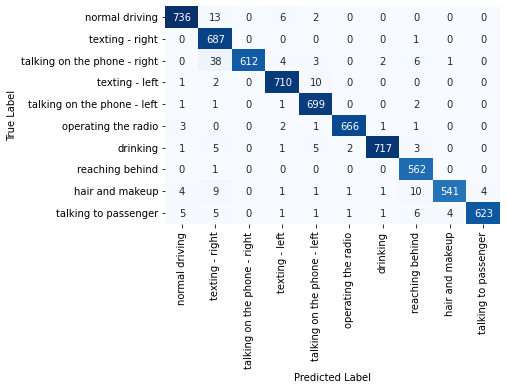

In [ ]:
test_predictions = np.argmax(model_0.predict(x_test_normalized), axis=-1)

from sklearn.metrics import classification_report, confusion_matrix

# Create a confusion matrix as a 2D array.
confusion_matrix = tf.math.confusion_matrix(y_test_flatten, test_predictions)

# Use a heatmap plot to display it.
ax = sns.heatmap(confusion_matrix, annot=True, fmt='.3g', cmap='Blues',
                 xticklabels=driver_classes, yticklabels=driver_classes, cbar=False)

# Add axis labels.
ax.set(xlabel='Predicted Label', ylabel='True Label')
plt.show()

In [ ]:
# printing the model summary
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 172800)            0         
                                                                 
 dense (Dense)               (None, 10)                1728010   
                                                                 
Total params: 1,728,010
Trainable params: 1,728,010
Non-trainable params: 0
_________________________________________________________________


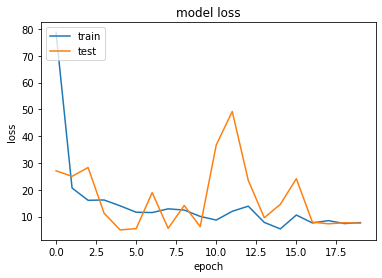

In [ ]:
plt.plot(history_0['loss'])
plt.plot(history_0['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Challenger Model #1 Results

As we can see from above, this first challenger model is a multi-class logistic regression model with 1,728,010 parameters.

Even with 20 epochs, this model only slightly better at predicting the correct class when compared to the baseline model. We see a fairly high loss of 7.7591 and an only slightly improved accuracy value of .9659

# Challenger Model #2: CNN

For our second challenger model we decided to implement a convolutional neural net (CNN) due to the nature of the problem. We also decided to go with a LeakyReLU activation function instead of a ReLU activation function as this has been shown to perform better with CNNs.

In [ ]:
tf.keras.backend.clear_session()

# initialized a sequential model
model_1 = Sequential()

# adding first conv layer with 16 filters and with kernel size 3
model_1.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(240, 240, 3)))

# adding leaky relu activation function with negative slope of 0.1
model_1.add(LeakyReLU(0.1))

# adding second conv layer with 32 filters and with kernel size 3
model_1.add(Conv2D(filters=32, kernel_size=3, padding='same'))

# adding leaky relu activation function with negative slope of 0.1
model_1.add(LeakyReLU(0.1))

# adding max pooling to reduce the size of output of second conv layer
model_1.add(MaxPooling2D(pool_size=2))

# flattening the 3-d output of fourth conv layer after max pooling to make it ready for creating dense connections with the output layer for predictions
model_1.add(Flatten())

# adding a fully connected dense layer with 256 neurons
model_1.add(Dense(256))

# adding leaky relu activation function with negative slope of 0.1
model_1.add(LeakyReLU(0.1))

# adding the output layer with 10 neurons and activation functions as softmax since this is a multi class classification problem
model_1.add(Dense(10, activation='softmax'))

In [ ]:
# printing the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 240, 240, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 240, 240, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 460800)            0         
                                                        

We are using the loss function as **categorical_crossentropy** as this is a multi-class classification problem.

In [ ]:
import tensorflow as tf
model_1.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate = 0.01),
    metrics=['accuracy']
)


In [ ]:

history_1 = model_1.fit(
            x_train_normalized, y_train_encoded,
            epochs=10,
            validation_data=(x_test_normalized, y_test_encoded),
            shuffle=True,
            verbose=2
)

Epoch 1/10
491/491 - 27s - loss: 6.7703 - accuracy: 0.7463 - val_loss: 0.1568 - val_accuracy: 0.9527 - 27s/epoch - 54ms/step
Epoch 2/10
491/491 - 12s - loss: 2370.5630 - accuracy: 0.4581 - val_loss: 63.6587 - val_accuracy: 0.5823 - 12s/epoch - 24ms/step
Epoch 3/10
491/491 - 12s - loss: 54.0288 - accuracy: 0.6128 - val_loss: 29.3592 - val_accuracy: 0.7290 - 12s/epoch - 24ms/step
Epoch 4/10
491/491 - 12s - loss: 25.5890 - accuracy: 0.7294 - val_loss: 12.8733 - val_accuracy: 0.7552 - 12s/epoch - 24ms/step
Epoch 5/10
491/491 - 12s - loss: 26.0433 - accuracy: 0.7402 - val_loss: 13.6722 - val_accuracy: 0.8225 - 12s/epoch - 24ms/step
Epoch 6/10
491/491 - 12s - loss: 18.4360 - accuracy: 0.7905 - val_loss: 14.6253 - val_accuracy: 0.8016 - 12s/epoch - 24ms/step
Epoch 7/10
491/491 - 12s - loss: 10.5312 - accuracy: 0.8519 - val_loss: 12.7665 - val_accuracy: 0.7748 - 12s/epoch - 24ms/step
Epoch 8/10
491/491 - 12s - loss: 14.4682 - accuracy: 0.8454 - val_loss: 7.0058 - val_accuracy: 0.8719 - 12s/epo

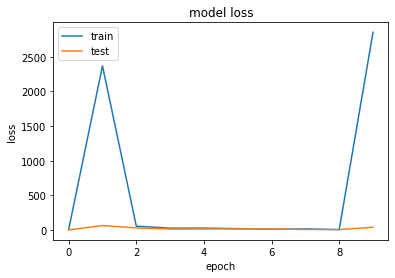

In [ ]:
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Challenger Model #2 Results

As we can see from above, this second challenger model is a CNN model with 117,972,714 parameters, which is 100x the number of parameters than the first challenger model. It does fairly well at predicting the correct image class.

After the 10th epoch, we see a high accuracy of [INSERT ACCURACY SCORE] on the test data.

In terms of our evaluation metric, multi-class logarithmic loss, we see a final vlaue of [INSERT LOSS VALUE].

The train loss value is higher than the test loss value indicating a potential overfitting. We will look to optimize for overfitting in our third and final challenger model.

# Challenger Model #3: CNN with Dropout

For our third challenger model we decided to build on our CNN architecture and add in three dropout layers to help reduce overfitting.

In [ ]:
# initialized a sequential model
model_2 = Sequential()

# adding first conv layer with 16 filters and with kernel size 3, padding same provided the output size same as the input size and input_shape denotes input image dimension of CIFAR
# images
model_2.add(Conv2D(filters=16, kernel_size=3, padding="same", input_shape=(240, 240, 3)))

# adding leaky relu activation function with negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# adding second conv layer with 32 filters and with kernel size 3
model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))

# adding leaky relu activation function with negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# adding max pooling to reduce the size of output of second conv layer
model_2.add(MaxPooling2D(pool_size=2))

# adding dropout to randomly switch off 25% of network to reduce overfitting
model_2.add(Dropout(0.25))

# adding third conv layer with 32 filters and with kernel size 3
model_2.add(Conv2D(filters=32, kernel_size=3, padding='same'))

# adding leaky relu activation function with negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# adding fourth conv layer with 64 filters and with kernel size 3
model_2.add(Conv2D(filters=64, kernel_size=3, padding='same'))

# adding leaky relu activation function with negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# adding max pooling to reduce the size of output of fourth conv layer
model_2.add(MaxPooling2D(pool_size=2))

# adding dropout to randomly switch off 25% of network to reduce overfitting
model_2.add(Dropout(0.25))

# flattening the 3-d output of fourth conv layer after max pooling to make it ready for creating dense connections with the output layer for predictions
model_2.add(Flatten())

# adding a fully connected dense layer with 256 neurons
model_2.add(Dense(256))

# adding leaky relu activation function with negative slope of 0.1
model_2.add(LeakyReLU(0.1))

# adding dropout to randomly switch off 50% of dense layer neurons to reduce overfitting
model_2.add(Dropout(0.5))

# adding the output layer with 10 neurons and activation functions as softmax since this is a multi class classification problem
model_2.add(Dense(10, activation='softmax'))

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 16)      448       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 240, 240, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 32)      4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 240, 240, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 120, 120, 32)      0         
                                                        

In [ ]:
import tensorflow as tf
model_2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.Adam(learning_rate=0.005), # here we are starting with 0.005 learning rate, by default it is 0.001
    metrics=['accuracy']
)

In [ ]:
history_2 = model_2.fit(
            x_train_normalized, y_train_encoded,
            epochs=10,
            validation_data=(x_test_normalized, y_test_encoded),
            shuffle=True,
            verbose=2
)

Epoch 1/10
491/491 - 35s - loss: 1.6231 - accuracy: 0.5836 - val_loss: 0.3624 - val_accuracy: 0.9087 - 35s/epoch - 71ms/step
Epoch 2/10
491/491 - 14s - loss: 0.3797 - accuracy: 0.8942 - val_loss: 0.2426 - val_accuracy: 0.9313 - 14s/epoch - 28ms/step
Epoch 3/10
491/491 - 14s - loss: 1019.1277 - accuracy: 0.2490 - val_loss: 13.9336 - val_accuracy: 0.3337 - 14s/epoch - 29ms/step
Epoch 4/10
491/491 - 14s - loss: 22.0001 - accuracy: 0.2722 - val_loss: 4.1551 - val_accuracy: 0.5431 - 14s/epoch - 29ms/step
Epoch 5/10
491/491 - 14s - loss: 12.4215 - accuracy: 0.3777 - val_loss: 2.3081 - val_accuracy: 0.6280 - 14s/epoch - 29ms/step
Epoch 6/10
491/491 - 14s - loss: 7.5538 - accuracy: 0.5212 - val_loss: 1.6352 - val_accuracy: 0.7820 - 14s/epoch - 29ms/step
Epoch 7/10
491/491 - 14s - loss: 4.5251 - accuracy: 0.6515 - val_loss: 0.7065 - val_accuracy: 0.8778 - 14s/epoch - 29ms/step
Epoch 8/10
491/491 - 14s - loss: 3.3260 - accuracy: 0.7260 - val_loss: 0.8395 - val_accuracy: 0.8762 - 14s/epoch - 29ms

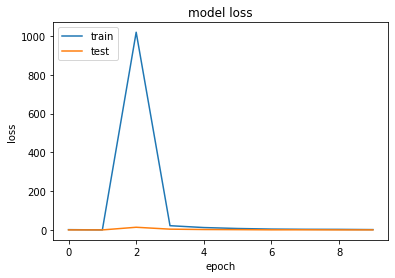

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Challenger Model #3 Results

As we can see from above, this second challenger model is a CNN model with 59,018,058 parameters, which is half the number of the second challenger model, but still 50x the number of parameters than the first challenger model.

This model does better than both challenger models with respect to loss and accuracy.

We can see that the accuracies from training and test datasets are consistent since the fourth epoch.

After the 10th epoch, we see a high accuracy of [INSERT ACCURACY] on the train data and ] on the validation data.

In terms of our evaluation metric, multi-class logarithmic loss, we see a consistent low loss on the 2nd epoch.


# Summary of Results

We can see from the results below that the first challenger model using multi-class logistic regression does only slightly better than the baseline model.

When we look at the CNN models, the second challenger model has a [INSERT ACCURACY]% accuracy score; however, it doesn't do very well when we calculate the multi-class log loss. Our hypothesis here was that the model was being overfitted, due to the number of epochs and the sheer number of testing examples. To compensate for this, we developed an incredibly powerful CNN model (Challenger model #3) that leverages four dropout layers. The results have surpassed our expectations, reducing the loss value to [INSERT VALUE] on the test data. If we were to submit these results to the State Farm Distracted Driver Kaggle Competition, we would come in approximately fourth place.

COMPONENTS | BASELINE MODEL | CHALLENGER MODEL #1: MULTI-CLASS LOGISTIC REGRESSION | CHALLENGER MODEL #2: CNN | CHALLENGER MODEL #3: CNN WITH DROPOUT
-|-|-|-|-
Number of Layers|N/A|2|9|17
Number of Dropout Layers|N/A|0|0|4
Number of Parameters|N/A|1,728,010|117,972,214|59,108,058
Number of Training Epochs|N/A|20|10|10
Filter Sizes|N/A|N/A|16 to 32|16 to 64
Kernel Size|N/A|N/A|3|3
Pool Size|N/A|N/A|2|2
Learning Rate|N/A|0.01|0.01|0.005
Optimizer|N/A|Adam|Adam|Adam
Activation Function|N/A|Softmax|LeakyReLU + Softmax|LeakyReLU + Softmax
Training Accuracy|Re-run model|Re-run model|Re-run model|Re-run model
**Testing Accuracy**|**Re-run model**|**Re-run model**|**Re-run model**|**Re-run model**
Training Loss|N/A|Re-run model|Re-run model|Re-run model
**Testing Loss**|**N/A**|**Re-run model**|**Re-run model**|**Re-run model**

# Conclusion

In conclusion, for multi-class image problems, the most optimal architecture is a CNN model which leverages dropout layers. When implementing this model architecture, we see an accuracy of [INSERT ACCURACY] and a log loss value of [INSERT VALUE] on the test data. We are incredibly happy with these results, and would have placed approximately fourth in the State Farm Distracted Driver Detection if we were to submit our model.